In [28]:
import numpy as np
from scipy.optimize import linprog as lp
from matplotlib import pyplot as plt
from tolsolvty import tolsolvty
%matplotlib inline

In [68]:
A = np.array([[1, -1, 3],
             [1, -1.1, 3],
             [0, 4, 0]])
mid_b = np.array([1.5, 4.5, 0])
rad_b = np.array([0.5, 0.5, 1])


inf_b = mid_b - rad_b
sup_b = mid_b + rad_b
print(inf_b, sup_b)

[ 1.  4. -1.] [2. 5. 1.]


In [69]:

infb = np.array([[inf_b[0]], [inf_b[1]], [inf_b[2]]])
supb = np.array([[sup_b[0]], [sup_b[1]], [sup_b[2]]])
[tolmax, argmax, envs, ccode] = tolsolvty(A, A, infb, supb)
print('tolmax = ', tolmax)
print('argmax = ', argmax)
print('envs = ', envs)
print('ccode = ', ccode)

 
 Допусковое множество решений интервальной линейной системы пусто 
 
tolmax =  [-0.9753095]
argmax =  [[ 0.24814816]
 [-0.49382627]
 [ 0.74444448]]
envs =  [[ 2.         -0.97530959]
 [ 1.         -0.9753079 ]
 [ 3.         -0.97530053]]
ccode =  3


In [70]:
n = 3
c = np.hstack([np.zeros(3), np.ones(3)])
neg_diag = -np.diag(rad_b)
r = np.hstack([-mid_b, mid_b])
A_big = np.block([[-A, neg_diag], [A, neg_diag]])

In [157]:
def solve_bounded(x_bounds, name_method):
    bounds = x_bounds + [(0, None)] * n

    res_simplex = lp(c, A_big, r, bounds=bounds,
                     method=name_method)

    omega_sum_s = sum(res_simplex.x[n:])
    omega_3 = res_simplex.x[-1]
    
    x_s = res_simplex.x[:-n]
    return omega_sum_s, x_s, omega_3





In [145]:
def l1_reg(A, mid_b, rad_b, w):
    print(mid_b, rad_b, w)
    for i in range(3):
        if abs(w[i]) <= 0.00000001:
            w[i] = 1
    inf_b = mid_b-w*rad_b
    sup_b = mid_b +w*rad_b
    print(inf_b, sup_b)
    infb = np.array([[inf_b[0]], [inf_b[1]], [inf_b[2]]])
    supb = np.array([[sup_b[0]], [sup_b[1]], [sup_b[2]]])
    [tolmax, argmax, envs, ccode] = tolsolvty(A, A, infb, supb)
    print('tolmax = ', tolmax)
    print('argmax = ', argmax)
    print('envs = ', envs)
    print('ccode = ', ccode)

In [165]:
def get_solution(c, A_big, r, name_method):
    bounds = [(None ,None), (None, None), (None, None)] +[(0, None)] * n 
    result = lp(c, A_big, r, bounds=bounds, method=name_method)
    final_x = result.x[:-n]
    final_w = result.x[n:]

    print(name_method, "results:")
    print(f"X = {final_x}")
    print(f"omegas = {final_w}")
    
    return final_w



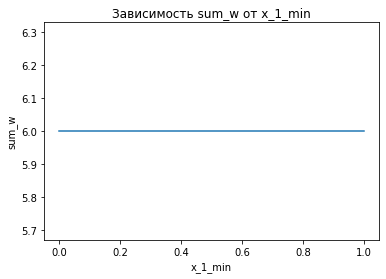

In [147]:
line, = plt.plot(x2min, sum_w, label='sum_w')
# 
# plt.legend(handles=[line], loc='upper right')

plt.title('Зависимость sum_w от x_1_min')
plt.xlabel('x_1_min')
plt.ylabel('sum_w')
plt.savefig('Зависимость sum_w от x_1_min.png')
plt.show()
plt.close()


simplex results:
X = [0.  0.  1.5]
omegas = [6. 0. 0.]
simplex results:
X = [0.1        0.         1.46666667]
omegas = [6. 0. 0.]
simplex results:
X = [0.2        0.         1.43333333]
omegas = [6. 0. 0.]
simplex results:
X = [0.3 0.  1.4]
omegas = [6. 0. 0.]
simplex results:
X = [0.4        0.         1.36666667]
omegas = [6. 0. 0.]
simplex results:
X = [0.5        0.         1.33333333]
omegas = [6. 0. 0.]
simplex results:
X = [0.6 0.  1.3]
omegas = [6. 0. 0.]
simplex results:
X = [0.7        0.         1.26666667]
omegas = [6. 0. 0.]
simplex results:
X = [0.8        0.         1.23333333]
omegas = [6. 0. 0.]
simplex results:
X = [0.9 0.  1.2]
omegas = [6. 0. 0.]
simplex results:
X = [1.         0.         1.16666667]
omegas = [6. 0. 0.]
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0] [6.0, 6.000000000000001, 6.0, 6.0, 5.999999999999999, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]


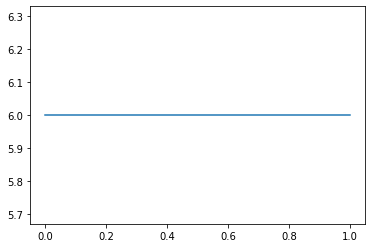

In [148]:
x2min = [0.1*i for i in range(11)]
sum_w = []
for i in range(11):
    w = get_solution(x2min[i], c, A_big, r, 'simplex')
    sum_w.append(sum(w))
print(x2min, sum_w)
plt.plot(x2min, sum_w)

In [161]:
def get_dot_for_plot(name_method):
    x_1 = [0.1*i for i in range(11)]
    x_2 = []
    x_3 = []
    for lower in x_1:
        bounds = [(lower, None), (0, None), (None, None)]
        omega_sum_s, x_s, omega_3 = solve_bounded(bounds, name_method)
        x_2.append(x_s[1])
        x_3.append(x_s[2])
        #w_3.append(omega_3)
    return x_2, x_3
def draw_plot(name_method, x_1, x_2, x_3):
    line1, = plt.plot(x_1, x_3, label='$x_3$')
    line2, = plt.plot(x_1, x_2, label='$x_2$')
    plt.legend(handles=[line1, line2], loc='lower right')
    plt.title(name_method)
    plt.xlabel('$x_1$')
    plt.savefig(name_method + '.png')
    plt.show()
    plt.close()

SIMPLEX METHOD
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1.5, 1.4666666666666666, 1.4333333333333333, 1.4, 1.3666666666666665, 1.3333333333333333, 1.3, 1.2666666666666666, 1.2333333333333334, 1.2, 1.1666666666666667]


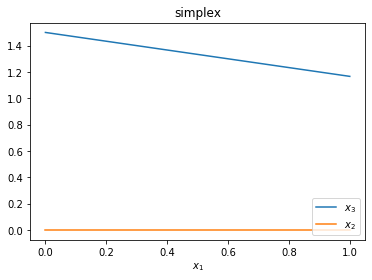

In [163]:
print("SIMPLEX METHOD")
# w = get_solution(c, A_big, r, 'simplex')
# print("Сумма w",sum(w))
# print("Регулязация")
# l1_reg(A, mid_b, rad_b, w)
x_2s, x_3s = get_dot_for_plot('simplex')
x_1s = [0.1*i for i in range(11)]
print(x_1s, x_2s, x_3s)
draw_plot('simplex', x_1s, x_2s, x_3s)

INTERIOR-POINT
interior-point results:
X = [ 2.87640314e-01 -8.74633699e-12  8.84094793e-01]
omegas = [2.87984939e+00 3.12015061e+00 1.74567176e-10]

Регулязация
[1.5 4.5 0. ] [0.5 0.5 1. ] [2.87984939e+00 3.12015061e+00 1.74567176e-10]
[ 0.06007531  2.93992469 -1.        ] [2.93992469 6.06007531 1.        ]
 
 Допусковое множество решений интервальной линейной системы непусто 
 
tolmax =  [0.01234556]
argmax =  [[ 0.26806669]
 [-0.24691213]
 [ 0.80420008]]
envs =  [[1.         0.01234544]
 [2.         0.01234584]
 [3.         0.01234884]]
ccode =  3


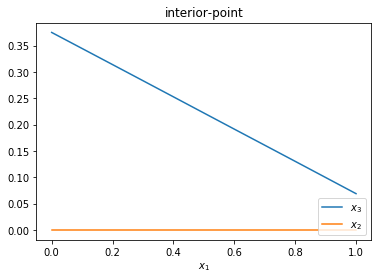

In [167]:
print("INTERIOR-POINT")
w = get_solution(c, A_big, r, 'interior-point')

print()
print("Регулязация")
l1_reg(A, mid_b, rad_b, w)
x_2i, x_3i = get_dot_for_plot('interior-point')
x_1i = [0.1*i for i in range(11)]
draw_plot('interior-point', x_1i, x_2i, x_3i)

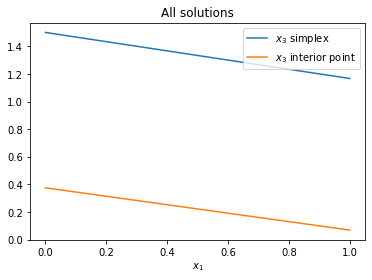

In [170]:

    
    

# line1, = plt.plot(x_1i, x_2s, label='$x_2$ simplex')
line2, = plt.plot(x_1i, x_3s, label='$x_3$ simplex')
# line3, = plt.plot(x_1i, x_1i, label='$x_2$ interior point')
line4, = plt.plot(x_1i, x_3i, label='$x_3$ interior point')
plt.legend(handles=[ line2,  line4], loc='upper right')
plt.title('All solutions')
plt.xlabel('$x_1$')
plt.savefig('all.png')
plt.show()
plt.close()

In [67]:
x_s = res_simplex.x[:-n]
w_s = res_simplex.x[n:]

x_ip = res_ip.x[:-n]
w_ip = res_ip.x[n:]

alpha = 0.5

x_conv = alpha * x_s + (1 - alpha) * x_ip
w_conv = alpha * w_s + (1 - alpha) * w_ip

print("Convex combination:")
print(f"X = {x_conv}")
print(f"omegas = {w_conv}")

Convex combination:
X = [ 1.43820157e-01 -4.37316849e-12  1.19204740e+00]
omegas = [4.43992469e+00 1.56007531e+00 8.72835882e-11]
